# Analysis of GPCR helices bind
*analysis of bend point distribution*
* use **alignment_extractor.p** to obtain data

In [1]:
import pandas as pd
import numpy as np
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
data_pair = pd.read_csv('GPCR-TM-table-identity-resis-pair.csv', index_col=None)
data.head()

,index,GPCR,Family,Class,Species,pdb_active,pdb_inactive,chain_a,chain_i,TM1_active,...,TM7_best_rotation_axis_a,TM7_best_angle_a,TM7_best_RMSD(T_A),TM7_pro_point_resi,TM7_pro_rotation_axis_b,TM7_pro_angle_b,TM7_pro_rotation_axis_a,TM7_pro_angle_a,TM7_pro_RMSD(T_A),TM7_NofPRO
0,0,5-HT2C receptor,5-Hydroxytryptamine receptors,Class A (Rhodopsin),Human,6bqg,6bqh,A,A,60-81,...,"(0.170366181253, 0.260404652236, 0.569229166512)",5.129634,0.401448,365,"(0.238040545216, 0.221324292534, 0.54063516225)",5.3198292925,"(0.0355626418953, 0.144841510546, 0.819595847559)",6.7240913608,0.5604037642,1
1,1,M2 receptor,Acetylcholine receptors (muscarinic),Class A (Rhodopsin),Human,4mqs,3uon,A,A,19-51,...,"(0.368904064944, 0.201095490638, 0.430000444418)",10.293347,0.377222,437,"(0.400795504656, 0.443399974677, 0.155804520667)",6.6982731328,"(0.0526270980276, 0.0675107699761, 0.879862131...",34.3429738199,0.4376085103,2
2,2,M2 receptor,Acetylcholine receptors (muscarinic),Class A (Rhodopsin),Human,4mqt,3uon,A,A,19-51,...,"(0.391791017313, 0.20417941822, 0.404029564467)",11.548836,0.376961,437,"(0.408377435264, 0.366528888374, 0.225093676363)",7.8024284448,"(0.00182583030513, 0.0966531080331, 0.90152106...",37.4121218977,0.4125374854,2
3,3,A2A receptor,Adenosine receptors,Class A (Rhodopsin),Human,5g53,3eml,A,A,2-34,...,"(0.0109754002083, 0.659889575814, 0.329135023978)",40.232861,0.525664,285,"(0.285904751747, 0.299824009386, 0.414271238867)",2.7091331871,"(0.232200101486, 0.276824446308, 0.490975452206)",32.6843457733,0.5683220029,2
4,4,A2A receptor,Adenosine receptors,Class A (Rhodopsin),Human,5g53,3pwh,A,A,2-34,...,"(0.0224804090648, 0.0692652480798, 0.908254342...",6.732151,0.762531,285,"(0.421252338736, 0.280036370631, 0.298711290633)",4.7321377344,"(0.103416599055, 0.439680754787, 0.456902646158)",36.362527849,0.7725219727,2


## Dataset preparation
*Returns dataset with relaive position of rotation points*

In [15]:
def get_calc_df(tm, data):
    
    diff = []
    family_names = []
    n_of_pro = []
    names_inactive = []
    names_active = []
    best_resis = []
    pro_resis = []
    
    tm_name = 'TM' + str(tm) + '_'
    
    for idx in data['index']:
        
        if data[tm_name + 'pro_rotation_axis_b'][idx] != 'noPRO':
            diff.append(int(data[tm_name + 'best_point_resi'][idx]) - int(data[tm_name + 'pro_point_resi'][idx]))
            family_names.append(data['Family'][idx].decode('utf-8'))
            n_of_pro.append(float(data[tm_name + 'NofPRO'][idx]))
            names_inactive.append(data['pdb_inactive'][idx])
            names_active.append(data['pdb_active'][idx])
            best_resis.append(int(data[tm_name + 'best_point_resi'][idx]))
            pro_resis.append(int(data[tm_name + 'pro_point_resi'][idx]))
        
    diff = np.array(diff)
    family_names = np.array(family_names)
    n_of_pro = np.array(n_of_pro)
    names_active = np.array(names_active)
    names_inactive = np.array(names_inactive)
    pro_resis = np.array(pro_resis)
    best_resis = np.array(best_resis)
    
    calc = pd.DataFrame({'pdb_active': names_active, 'pdb_inactive': names_inactive, 'N_of_PRO': n_of_pro, 'Family': family_names, 'best-pro_TM' + str(tm): diff, 'best_point_resi': best_resis, 'pro_point_resi': pro_resis})
    return calc

## Histogramm Analysis
### Histogramms of distance between best rotation point and proline rotation point

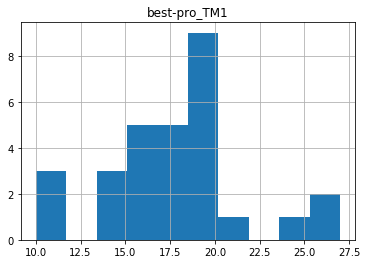

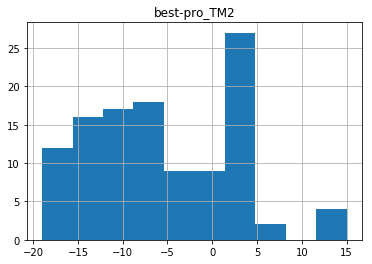

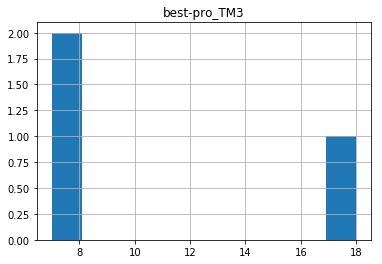

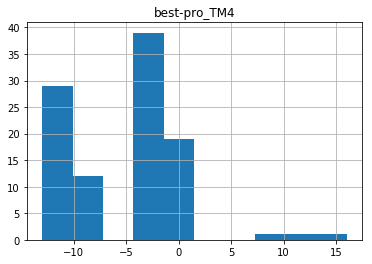

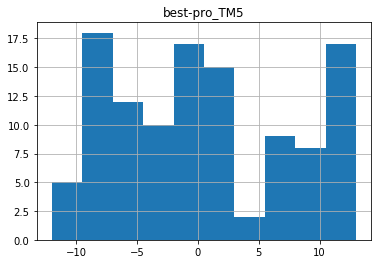

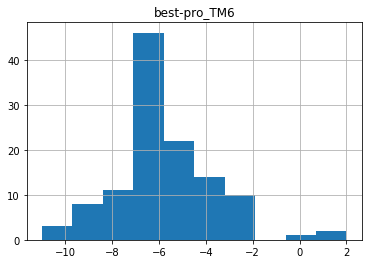

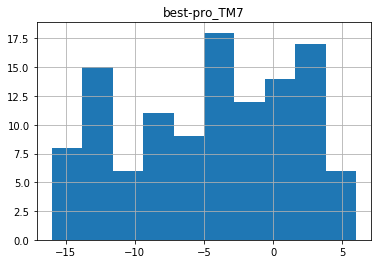

In [8]:
for tm in range (1, 8):
    result_data = get_calc_df(tm, data_pair)
    result_data.hist(column='best-pro_TM' + str(tm))

#    plt.savefig('/home/andrew/Documents/Diploma/GPCRSampling/images/best-pro_TM_new' + str(tm) + '.png', dpi=150, format='png')

### Bad distributed GPCRs analysis

In [16]:
df_tm5 = get_calc_df(5, data_pair)
df_tm7 = get_calc_df(7, data_pair)

In [17]:
df_test = df_tm5[df_tm5['best-pro_TM5'] > 10]
df_test

,Family,N_of_PRO,best-pro_TM5,best_point_resi,pdb_active,pdb_inactive,pro_point_resi
9,Adenosine receptors,2.0,12,201,5g53,3vg9,189
10,Adenosine receptors,2.0,12,201,5g53,3vga,189
11,Adenosine receptors,2.0,11,200,5g53,4eiy,189
17,Adenosine receptors,2.0,11,200,5g53,5jtb,189
18,Adenosine receptors,2.0,11,200,5g53,5k2a,189
20,Adenosine receptors,2.0,11,200,5g53,5k2c,189
22,Adenosine receptors,2.0,11,200,5g53,5mzj,189
33,Adenosine receptors,2.0,11,200,5g53,5uvi,189
34,Adenosine receptors,2.0,11,200,5g53,5vra,189
57,Adrenoceptors,1.0,11,222,4lde,3kj6,211


### Histogram of RMSD distribution

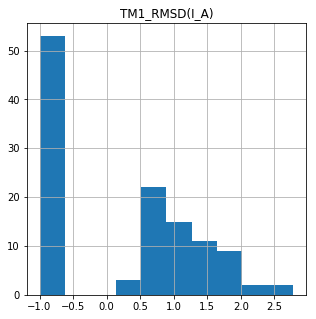

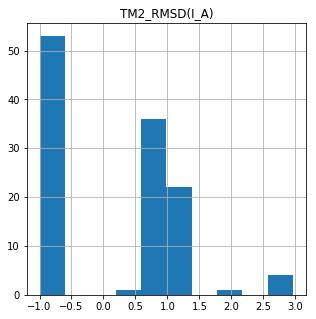

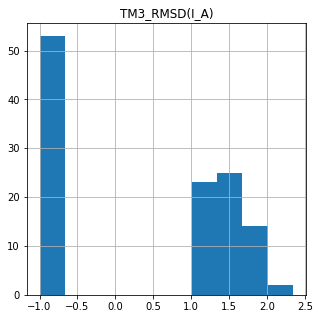

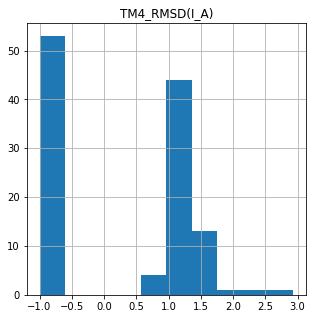

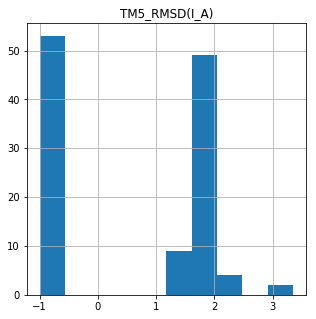

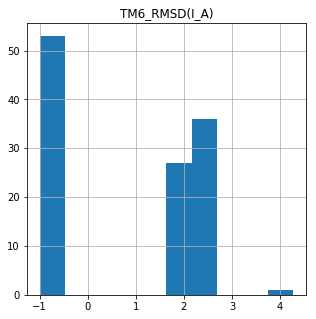

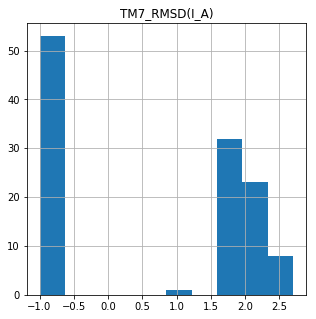

In [5]:
for tm in range (1, 8):
    name = 'TM' + str(tm) + '_RMSD(I_A)'
    data.hist(column=name, figsize=(5, 5))
#    plt.savefig('/home/andrew/Documents/Diploma/GPCRSampling/images/RMSD_I_A_old' + str(tm) + '.png', dpi=150, format='png')